<br><br>
<font size='6'><b>Regression</b></font><br><br>

<br><br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Linear-Regression" data-toc-modified-id="1.-Linear-Regression-1">1. Linear Regression</a></span></li><li><span><a href="#2.-Multivariate-Linear-Regression" data-toc-modified-id="2.-Multivariate-Linear-Regression-2">2. Multivariate Linear Regression</a></span></li><li><span><a href="#3.-Nonlinear-Regression" data-toc-modified-id="3.-Nonlinear-Regression-3">3. Nonlinear Regression</a></span></li><li><span><a href="#4.-Overfitting" data-toc-modified-id="4.-Overfitting-4">4. Overfitting</a></span></li></ul></div>

# 1. Linear Regression

Consider a linear regression.

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\theta_{0}$ and $\theta_{1}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \theta_{0} + \theta_{1}x_{i}$$

- $ \hat{y}_{i} $ : predicted output 

- $ \theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}\,; \theta) \; \text{ in general}$$

- in many cases, a linear model is used to predict $y_{i}$


$$ \hat{y}_{i} = \theta_{0} + \theta_{1}x_{i} \; \quad \text{  such that  }\quad  \min\limits_{\theta_{0}, \theta_{1}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<br><br>

<center><img src='./image_files/linear_regression_data.png' width = 400></center>

__Scikit-Learn__


<center><img src='./image_files/Scikit_learn_logo.png' width = 300></center>

<br>

- Machine Learning in Python
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license


- https://scikit-learn.org/stable/index.html#

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

In [3]:
from sklearn import linear_model

In [4]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [5]:
reg.coef_

array([[0.67129519]])

In [6]:
reg.intercept_

array([0.65306531])

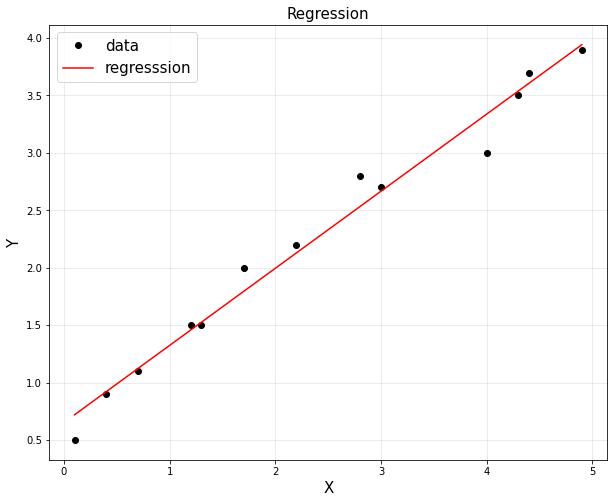

In [11]:
# to plot
plt.figure(figsize = (10,8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x,y,'ko',label = 'data')
# to plot a straight line (fitted line)

plt.plot(x, reg.predict(x), 'r', label = 'regresssion')
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

# 2. Multivariate Linear Regression 

(= linear regression for multivariate data)

<br>

$$ \hat{y} = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2  $$ $$$$ $$$$

$$\phi \left(x^{(i)}\right) = \begin{bmatrix}1\\x^{(i)}_{1}\\x^{(i)}_{2} \end{bmatrix}$$

<img src='./image_files/multi_regression.png' width = 300>

In [12]:
# for 3D plot
from mpl_toolkits.mplot3d import Axes3D

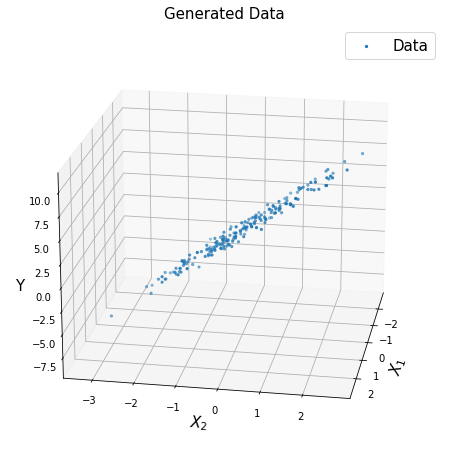

In [16]:
# y = theta0 + theta1*x1 + theta2*x2 + noise

n = 200
x1 = np.random.randn(n,1)
x2 = np.random.randn(n,1) 
noise = 0.5*np.random.randn(n,1)

y = 2 + 1*x1 +3*x2 +noise

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Generated Data', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.view_init(20,10)
plt.legend(fontsize = 15)
plt.show()

<br>

$$\Phi = \begin{bmatrix}1 & x_{1}^{(1)} & x_{2}^{(1)}\\1 & x_{1}^{(2)} & x_{2}^{(2)}\\ \vdots \\1 & x_{1}^{(m)} & x_{2}^{(m)} \end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}^{(1)} \\\hat{y}^{(2)} \\\vdots \\\hat{y}^{(m)}\end{bmatrix}=\Phi\theta$$

<br><br>

$$\implies \theta^{*} = (\Phi^T \Phi)^{-1} \Phi^T y$$

In [40]:
len(y)
len(A.T)

2

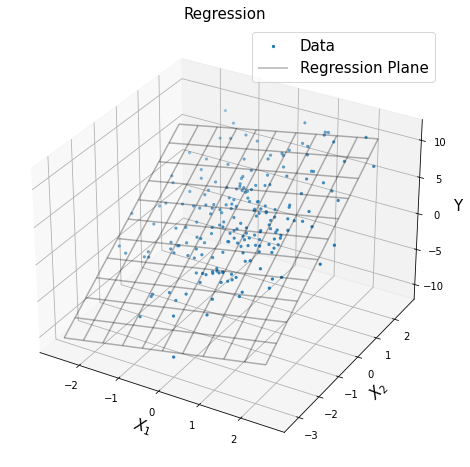

In [20]:
#% matplotlib qt5

A = np.hstack([np.ones((n,1)),x1,x2])##가로로 쌓음
A = np.asmatrix(A)
theta = (A.T*A).I*A.T*y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1),0.5),
                    np.arange(np.min(x2), np.max(x2),0.5))
YP = theta[0,0] +theta[1,0]*X1 +theta[2,0]*X2

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Regression', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.plot_wireframe(X1, X2, YP, color = 'k', alpha = 0.3, label = 'Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()

# 3. Nonlinear Regression 

(= Linear Regression for Non-linear Data)

<br>
<center><img src = './image_files/nonlinear.png' width = 300 align="center"></center>

- Same as linear regression, just with non-linear features

<br>
$$
\begin{align*}
y &= \theta_0 + \theta_1 x + \theta_2 x^2 + \text{noise}
\end{align*}
$$

<br><br>
$$\begin{bmatrix}x_{i}\\x_{i}^2 \end{bmatrix}$$

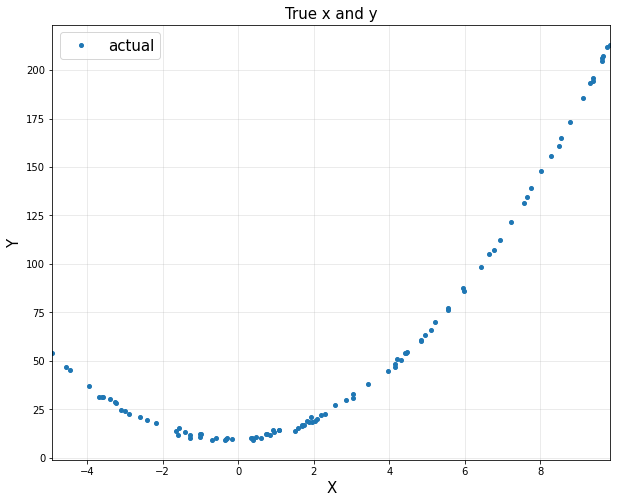

In [27]:
# y = theta0 + theta1*x + theta2*x^2 + noise

n = 100#100개의 데이터 생성
x = -5 +15*np.random.rand(n,1)
noise = 1*np.random.randn(n,1)

y = 10 + 1*x + 2*x**2 + noise #  곡선
plt.figure(figsize = (10,8))
plt.title('True x and y', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x,y, 'o',markersize = 4, label = 'actual')
plt.xlim([np.min(x), np.max(x)])#x축 제한
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

In [28]:
A = np.hstack([x,x**2])
A = np.asmatrix(A)

reg = linear_model.LinearRegression()
reg.fit(A,y)


LinearRegression()

In [29]:
reg.coef_

array([[1.01171329, 2.00101309]])

In [30]:
reg.intercept_##bias 항 출력

array([9.85032263])

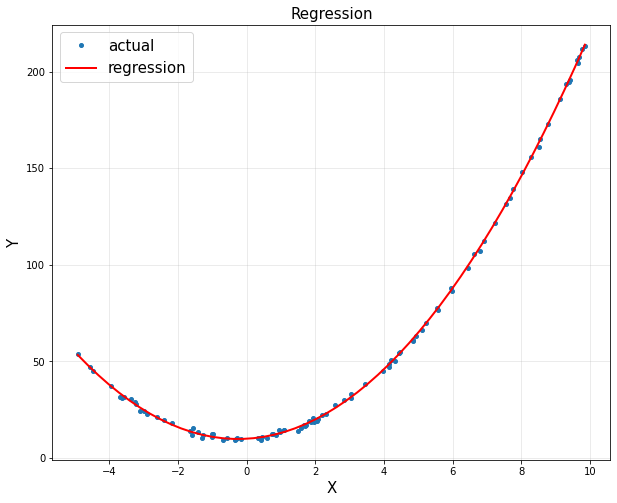

In [31]:
xp = np.linspace(np.min(x),np.max(x)).reshape(-1,1)
Ap = np.hstack([xp, xp**2])
Ap = np.asmatrix(Ap)

# to plot
plt.figure(figsize = (10,8))
plt.title('Regression',fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x,y,'o',markersize = 4, label = 'actual')
# to plot a straight line (fitted line)

plt.plot(xp, reg.predict(Ap),'r', linewidth=2,label = 'regression')
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()
    


# 4. Overfitting


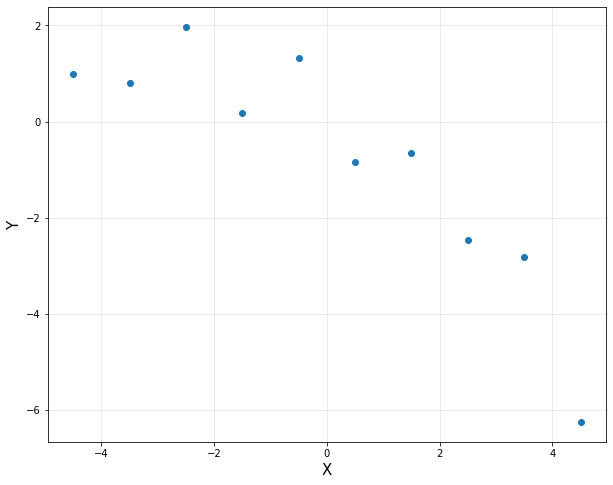

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])


plt.figure(figsize = (10,8))
plt.plot(x,y,'o',label = 'Data')
plt.xlabel('X',fontsize = 15)
plt.ylabel('Y',fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

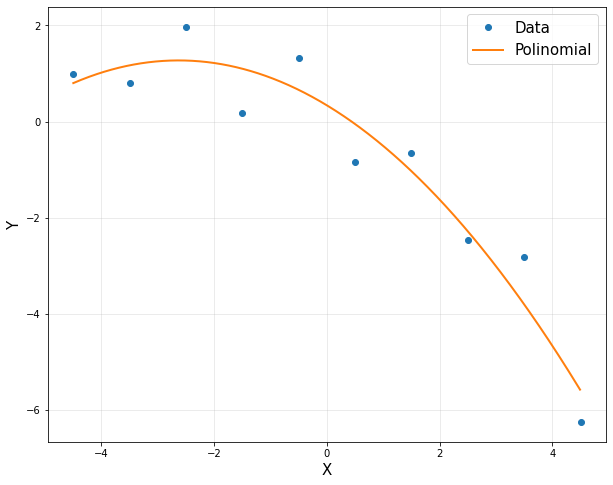

In [34]:
p = np.polyfit(x,y, deg = 2) 

xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

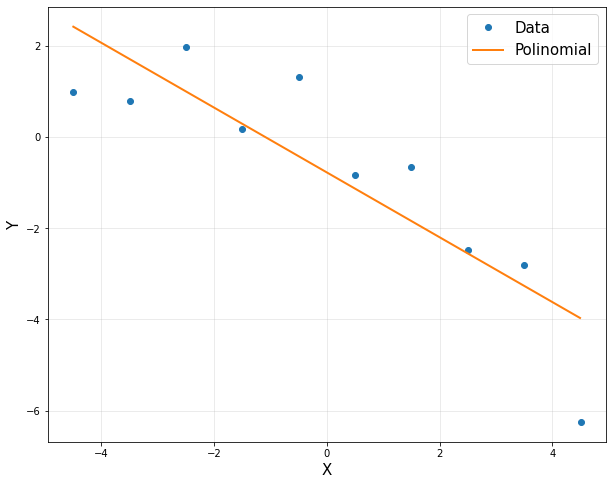

In [18]:
p = np.polyfit(x,y, deg = 1) 

xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

In [21]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>